Title

Description

Importing packages.

In [108]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Importing data into pandas DataFrame.

In [109]:
df = pd.read_csv(r"fullDataFinal.csv", index_col=0)
df.columns = df.columns.str.strip()
df.sample(5)

,fire_size_class,latitude,longitude,discovery_month,weekday,Vegetation,remoteness,elevation,Temp,Wind,Humidity,Precipitation
20444,B,34.192780,-103.326942,Mar,True,Broadleaf Forest,0.332036,1230.0,11.608695,5.785019,40.946309,0.833333
16717,B,30.424234,-96.619874,Jun,True,Shrubland,0.270895,97.0,23.612034,1.955195,74.880809,0.000000
30733,B,44.556374,-89.079755,Apr,True,Rock,0.193404,298.0,1.534165,4.768231,63.517792,0.000000
8955,D,33.523333,-116.831667,May,True,Broadleaf Forest,0.465789,960.0,23.146435,4.462542,38.606667,0.000000
3079,B,37.389662,-89.662373,Mar,False,NaN,0.201713,153.0,3.326913,4.416231,74.310047,14.466667


Separate target variable (fire_size_class) from predictor variables.

In [110]:
dfTarget = df["fire_size_class"]
dfPredictor = df[["latitude", "longitude", "discovery_month", "weekday", "Vegetation", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"]]

Before doing anything, let's check the distribution of our data by plotting a histogram

d:\pycharmprojects\thesis\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'remoteness'}>],
       [<AxesSubplot:title={'center':'elevation'}>,
        <AxesSubplot:title={'center':'Temp'}>,
        <AxesSubplot:title={'center':'Wind'}>],
       [<AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'Precipitation'}>, <AxesSubplot:>]],
      dtype=object)

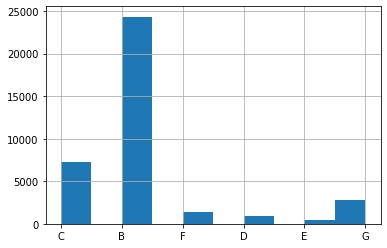

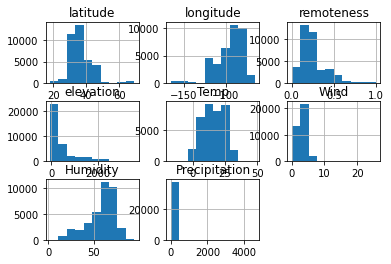

In [111]:
dfTarget.hist()
dfPredictor.hist()

From the first histogram we can see that the "B" class is *way* overrepresented in our data and there is an imbalance.

In order to deal with this, I chose to undersample the B class.



Changing categorical variables into one-hot encoded ones.

In [112]:
# First let's do fire_size_class
dfTarget = pd.concat([dfTarget, pd.get_dummies(dfTarget)], axis=1)  # use get_dummies and concatenate the result to dfTarget
dfTarget.drop(["fire_size_class"], axis=1, inplace=True)  # and remove the old column
dfTarget.sample(5)

,B,C,D,E,F,G
3556,0,1,0,0,0,0
8806,1,0,0,0,0,0
4202,1,0,0,0,0,0
28379,1,0,0,0,0,0
16869,1,0,0,0,0,0


In [113]:
# Now Vegetation
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["Vegetation"], prefix="Veg", prefix_sep=" ")], axis=1)
dfPredictor.drop(["Vegetation"], axis=1, inplace=True)

# And discovery_month
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["discovery_month"])], axis=1)
dfPredictor.drop(["discovery_month"], axis=1, inplace=True)

# And weekday
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["weekday"])], axis=1)
dfPredictor.drop(["weekday"], axis=1, inplace=True)
dfPredictor.rename(columns={False:"is_weekend", True:"is_weekday"}, inplace=True)
dfPredictor.sample(5)

,latitude,longitude,remoteness,elevation,Temp,Wind,Humidity,Precipitation,Veg Broadleaf Forest,Veg Desert,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,is_weekend,is_weekday
16434,30.950300,-84.513900,0.159220,44.0,20.235494,3.443462,65.252039,16.000000,0,0,...,0,0,0,0,0,0,0,0,0,1
10825,36.799400,-113.699200,0.432276,1489.0,23.661022,3.213117,32.541044,2.866667,0,0,...,0,0,0,0,0,0,0,0,0,1
21088,42.993327,-73.786542,0.058208,102.0,10.826467,3.575197,57.504154,32.533333,0,0,...,0,0,0,0,1,0,0,0,0,1
34746,38.424722,-119.961111,0.110191,2067.0,15.653891,1.938405,53.334981,7.433333,0,0,...,0,0,0,0,0,0,0,0,1,0
18307,35.350300,-118.403300,0.480540,1044.0,23.960717,7.392457,22.343512,0.000000,0,0,...,0,0,1,0,0,0,0,0,0,1


Scaling numerical data to 0-1 range.

In [114]:
from sklearn.preprocessing import MinMaxScaler

dfPredictorScaled = pd.DataFrame(MinMaxScaler().fit_transform(dfPredictor[["latitude", "longitude", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"]]), columns=["latitude", "longitude", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"])
# dfPredictorScaled.sample(5)

dfPredictor = dfPredictor.assign(**dfPredictorScaled.to_dict(orient="series"))  # replace the columns of the old df with the ones from the new one
dfPredictor.sample(5)


,latitude,longitude,remoteness,elevation,Temp,Wind,Humidity,Precipitation,Veg Broadleaf Forest,Veg Desert,...,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,is_weekend,is_weekday
9506,0.531915,0.565194,0.379929,0.369172,0.505966,0.121322,0.635742,0.000000,0,0,...,0,0,1,0,0,0,0,0,1,0
36197,0.490737,0.499296,0.043365,0.299232,0.643600,0.176837,0.260190,0.000000,0,0,...,0,1,0,0,0,0,0,0,1,0
34042,0.559069,0.455374,0.142926,0.095721,0.669817,0.089503,0.562099,0.000406,0,0,...,0,1,0,0,0,0,0,0,0,1
29088,0.574503,0.716476,0.235192,0.126440,0.321837,0.176388,0.654618,0.002298,0,0,...,0,0,0,0,0,0,0,0,0,1
17619,0.582177,0.587588,0.357500,0.222436,0.424730,0.174650,0.512281,0.000000,0,0,...,0,0,0,0,1,0,0,0,1,0


d:\pycharmprojects\thesis\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


array([[<AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'remoteness'}>,
        <AxesSubplot:title={'center':'elevation'}>,
        <AxesSubplot:title={'center':'Temp'}>],
       [<AxesSubplot:title={'center':'Wind'}>,
        <AxesSubplot:title={'center':'Humidity'}>,
        <AxesSubplot:title={'center':'Precipitation'}>,
        <AxesSubplot:title={'center':'Veg Broadleaf Forest'}>,
        <AxesSubplot:title={'center':'Veg Desert'}>],
       [<AxesSubplot:title={'center':'Veg Grassland'}>,
        <AxesSubplot:title={'center':'Veg Needleleaf Forest'}>,
        <AxesSubplot:title={'center':'Veg Rock'}>,
        <AxesSubplot:title={'center':'Veg Shrubland'}>,
        <AxesSubplot:title={'center':'Apr'}>],
       [<AxesSubplot:title={'center':'Aug'}>,
        <AxesSubplot:title={'center':'Dec'}>,
        <AxesSubplot:title={'center':'Feb'}>,
        <AxesSubplot:title={'center':'Jan'}>,
        <AxesSu

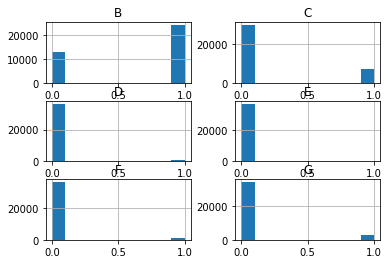

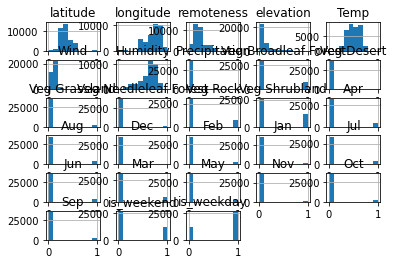

In [115]:
dfTarget.hist()
dfPredictor.hist()

Make a correlation matrix

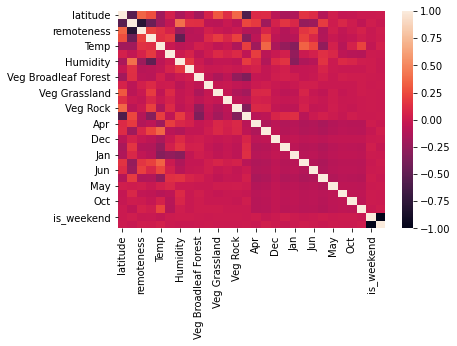

In [116]:
import seaborn as sn

corrMatrix = dfPredictor.corr()
sn.heatmap(corrMatrix)
plt.show()

Train-test split

In [117]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dfPredictor, dfTarget, test_size=0.1, random_state=42)

print(X_train.shape)
print(y_train.shape)

(33522, 28)
(3725, 28)


In [129]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
x_ros, y_ros = ros.fit_resample(X_train, y_train)

AttributeError: 'DataFrame' object has no attribute 'argmax'

Training models, each in a cell (?)

* Dummy classifier
* K-Nearest Neighbour (KNN)
* Naïve Bayes (NB)
* Support Vector Machine (SVM)
* Decision Tree (DT)
* Random Forest (RF)
* Gradient Boosted Trees (GBT)
* Multi-Layered Perceptron (MLP)
* Artificial Neural Network (ANN)

Evaluation with confusion matrix, F1 score, etc

### Dummy classifier

In [ ]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")

dummy_clf.fit(X_train, y_train)
training_accuracy = dummy_clf.score(X_train, y_train)
test_accuracy = dummy_clf.score(X_test, y_test)
print(f"Training accuracy: {training_accuracy}")  # 0.6537796074219915
print(f"Test accuracy: {test_accuracy}")  # 0.6502013422818792


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import time  # optional for timing the code

training_accuracy = []
test_accuracy = []
nNeighbors = range(5, 15, 2)

tic = time.perf_counter()  # timing start
for nNeighbor in nNeighbors:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=nNeighbor, n_jobs=-1)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
toc = time.perf_counter()  # timing end
print(f"Trained in in {toc - tic:0.4f} seconds")  # print the time elapsed

plt.plot(nNeighbors, training_accuracy, label="training accuracy")
plt.plot(nNeighbors, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

9 seems to be the best on our test set. Let's train that model and save it.

In [ ]:
clf = KNeighborsClassifier(n_neighbors=9, n_jobs=-1)
clf.fit(X_train, y_train)

training_accuracy = clf.score(X_train, y_train)
test_accuracy = clf.score(X_test, y_test)
print("Number of neighbors: 9")
print(f"\nTraining accuracy: {training_accuracy}")  # 0.7298490543523656
print(f"\nTest accuracy: {test_accuracy}")  # 0.6934228187919463

### Naive Bayes

In [ ]:
from sklearn.multioutput import MultiOutputClassifier  # (https://sklearn.org/modules/multiclass.html#multioutput-classification)

# train a Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
multi_gnb = MultiOutputClassifier(gnb, n_jobs=-1)
multi_gnb.fit(X_train, y_train)
print(f"GaussianNB train score: {multi_gnb.score(X_train, y_train)}")  # 0.21296462024938845
print(f"GaussianNB test score: {multi_gnb.score(X_test, y_test)}")  # 0.21986577181208053
print("\n")


### Support Vector Machine

In [ ]:
import time  # optional for timing the code
from sklearn.svm import SVC
from sklearn.multioutput import MultiOutputClassifier  # (https://sklearn.org/modules/multiclass.html#multioutput-classification)

training_accuracy = []
test_accuracy = []
C = [0.01, 0.1, 0.25, 0.5, 0.75, 1]

tic = time.perf_counter()  # timing start
for c in C:
    svm = SVC(C = c)
    multi_svm = MultiOutputClassifier(svm, n_jobs=-1)
    multi_svm.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(multi_svm.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(multi_svm.score(X_test, y_test))
toc = time.perf_counter()  # timing end
print(f"Trained in in {toc - tic:0.4f} seconds")  # print the time elapsed

plt.plot(C, training_accuracy, label="training accuracy")
plt.plot(C, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Value of C")
plt.legend()

Best seems to be with C = 0.25

Now lets train the final SVM

In [ ]:
svm = SVC(C = 0.25)
multi_svm = MultiOutputClassifier(svm, n_jobs=-1)
multi_svm.fit(X_train, y_train)

print(f"Kernel SVM train score: {multi_svm.score(X_train, y_train)}")  # 0.7018077680329335
print(f"Kernel SVM test score: {multi_svm.score(X_test, y_test)}")  # 0.6977181208053691
print("\n")

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 20, 40]}

grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, )
grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
print(scores)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best max_depth is 5 -->  0.72060144

In [ ]:
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)

print(f"Decision Tree train score: {dt.score(X_train, y_train)}")  # 0.7240618101545254
print(f"Decision Tree test score: {dt.score(X_test, y_test)}")  # 0.7103355704697987
print("\n")

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':[2,4,8,10,11,12,13,14,15,16,20,30,40]}

grid_search = GridSearchCV(RandomForestClassifier(n_jobs=-1, warm_start=True), param_grid, cv=5)
grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
print(scores)

print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

Best seems to be with max_depth=12

In [ ]:
rf = RandomForestClassifier(max_depth=12, n_jobs=-1)
rf.fit(X_train, y_train)

print(f"Random Forest train score: {rf.score(X_train, y_train)}")  # 0.7210786945886284
print(f"Random Forest test score: {rf.score(X_test, y_test)}")  # 0.6877852348993289
print("\n")


### Gradient Boosted Trees (GBT)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.multioutput import MultiOutputClassifier  # (https://sklearn.org/modules/multiclass.html#multioutput-classification)

param_grid = {'estimator__max_depth':[2,4,8,16,30,40], 'estimator__loss':['deviance', 'exponential']}

gbt = MultiOutputClassifier(GradientBoostingClassifier(verbose=0, warm_start=True))
grid_search = GridSearchCV(gbt, param_grid, cv=5)

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
print(scores)

print('Best parameters found:\n', grid_search.best_params_)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))

### Multi-Layered Perceptron (MLP)

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(5, 10, 5), (15, 30, 15), (5, 10, 10, 5), (15, 30, 5)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant']
}

grid_search = GridSearchCV(MLPClassifier(max_iter=10000), param_grid, cv=5)

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
print(scores)

y_true, y_pred = y_test , grid_search.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(y_true, y_pred))

print('Best parameters found:\n', grid_search.best_params_)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
